# Welcome

Disclaimer: The dataset has minor modifications to protect its confidentiality.
Description: You are given a dataset of patients to be tested for heart disease. Features are given below.

age

sex → Male, Female

cp → chest pain type (4 values)

trestbps → resting blood pressure

chol → serum cholestoral in mg/dl

fbs → fasting blood sugar > 120 mg/dl

restecg → resting electrocardiographic results, values: 0,1,2

thalach → maximum heart rate achieved

exang → exercise induced angina

oldpeak → ST depression induced by exercise relative to rest

slope → the slope of the peak exercise ST segment

ca → number of major vessels colored by flourosopy, values: 0,1,2,3,4

thal → values: 0,1,2,3

target → is the column we want to predict.

### What is done: 

Support Vector Machine (with both Linear and RBF kernel) classifier,

Decision Tree Classifier,

Random Forest Classifier,

Logistic Regression,

Naive Bayes Classifier,

KNN Classifier,

to predict whether patient have heart disease or not and decide which algorithm performs the best on average

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from warnings import filterwarnings
# filterwarnings("ignore")

pd.options.display.max_columns = 10000
pd.options.display.max_rows = 50
# pd.options.display.max_colwidth = -1  # no limit

pd.options.display.min_rows = 15


In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [6]:
import copy 

df=copy.deepcopy(data)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [7]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
df.describe().T

# mean of age: 54
# mean of 'sex' column (relationship): 0.68
# mean of target (inbalance check): 0.54

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
df.shape

(303, 14)

# Visualisation

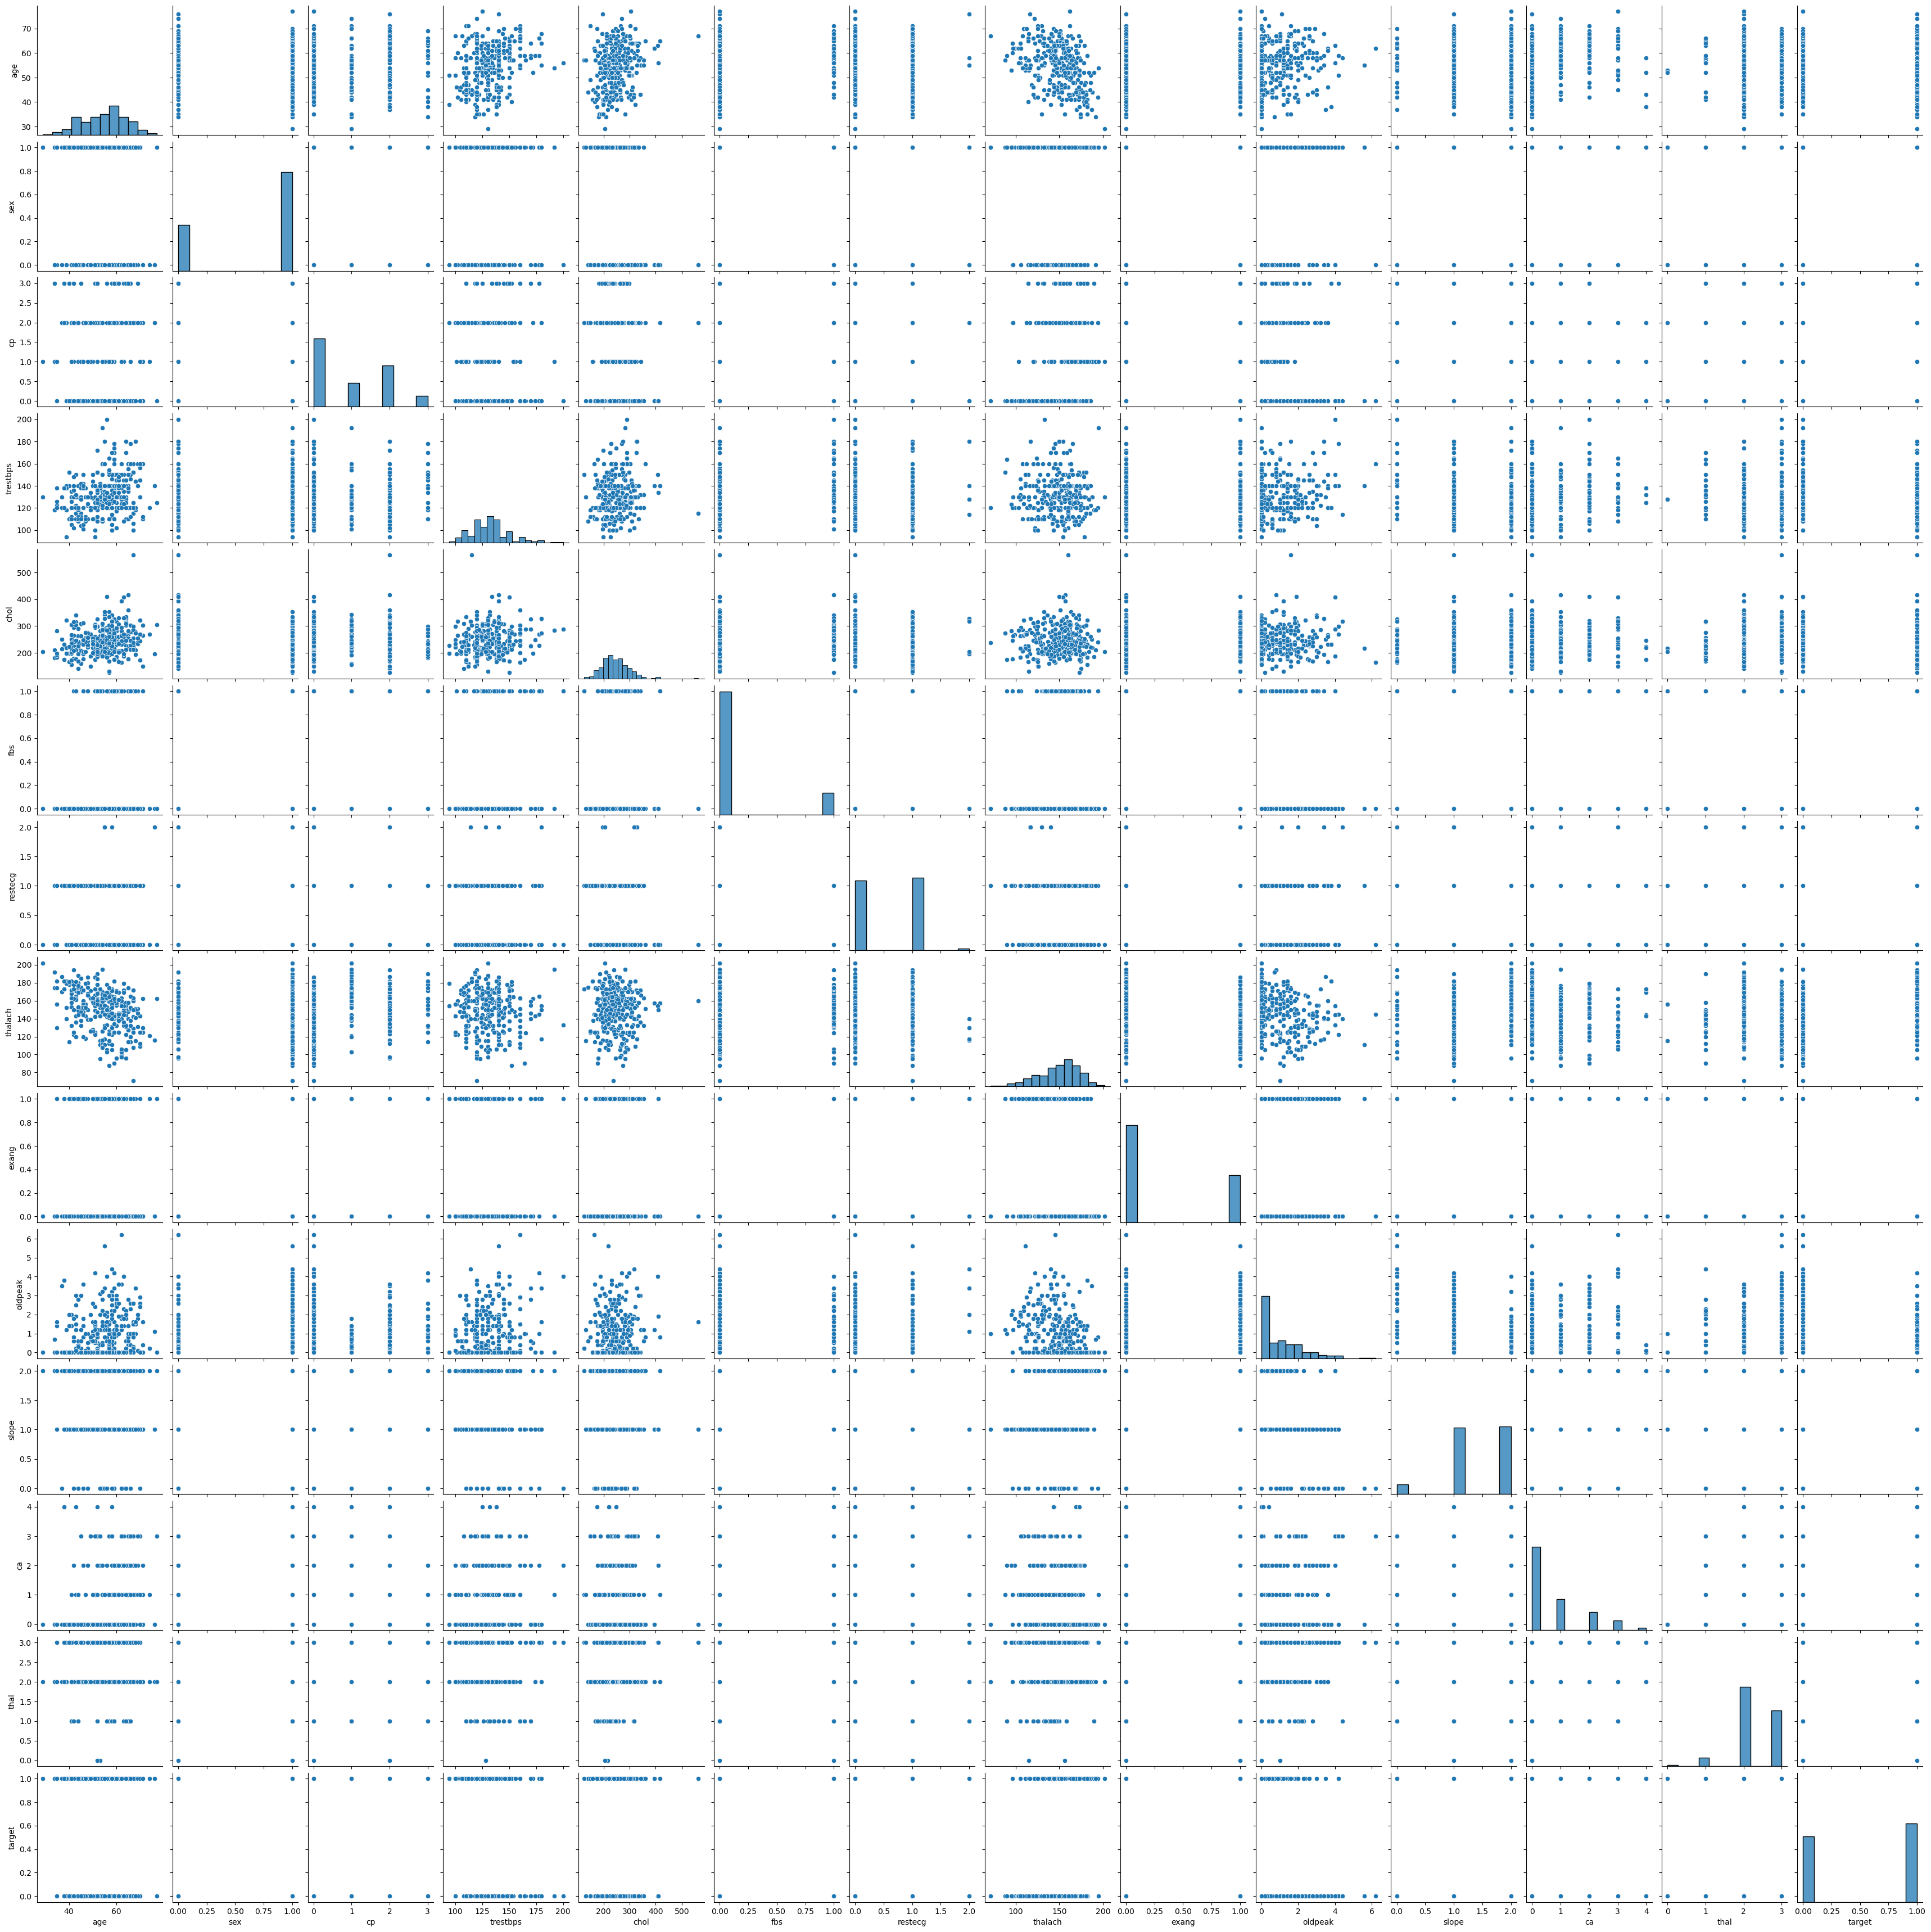

In [16]:
sns.pairplot(df)
plt.show()

# Diagonal consists from distplots  
# If normal, there aren't outliers  

# Others for lines → Bernoulli distribution shows there is no high correlation  
# Uniform distribution (from left ↑ to right →) → there is not high correlation  
# Good for modelling  

# Bernoulli and Uniform dist show they are categorical columns, but expressed(written) in numbers  

# Linear azalışın olmaması columnlar arası cütlər də yassıdı, yəni ortaq bir baxış bucağı deməkdi → targetə. Beləliklə multicollinearity az olur  

# If there aren’t linear dependence between different feature columns  
# This is good for modelling also. Different explanation for target (different angle)


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


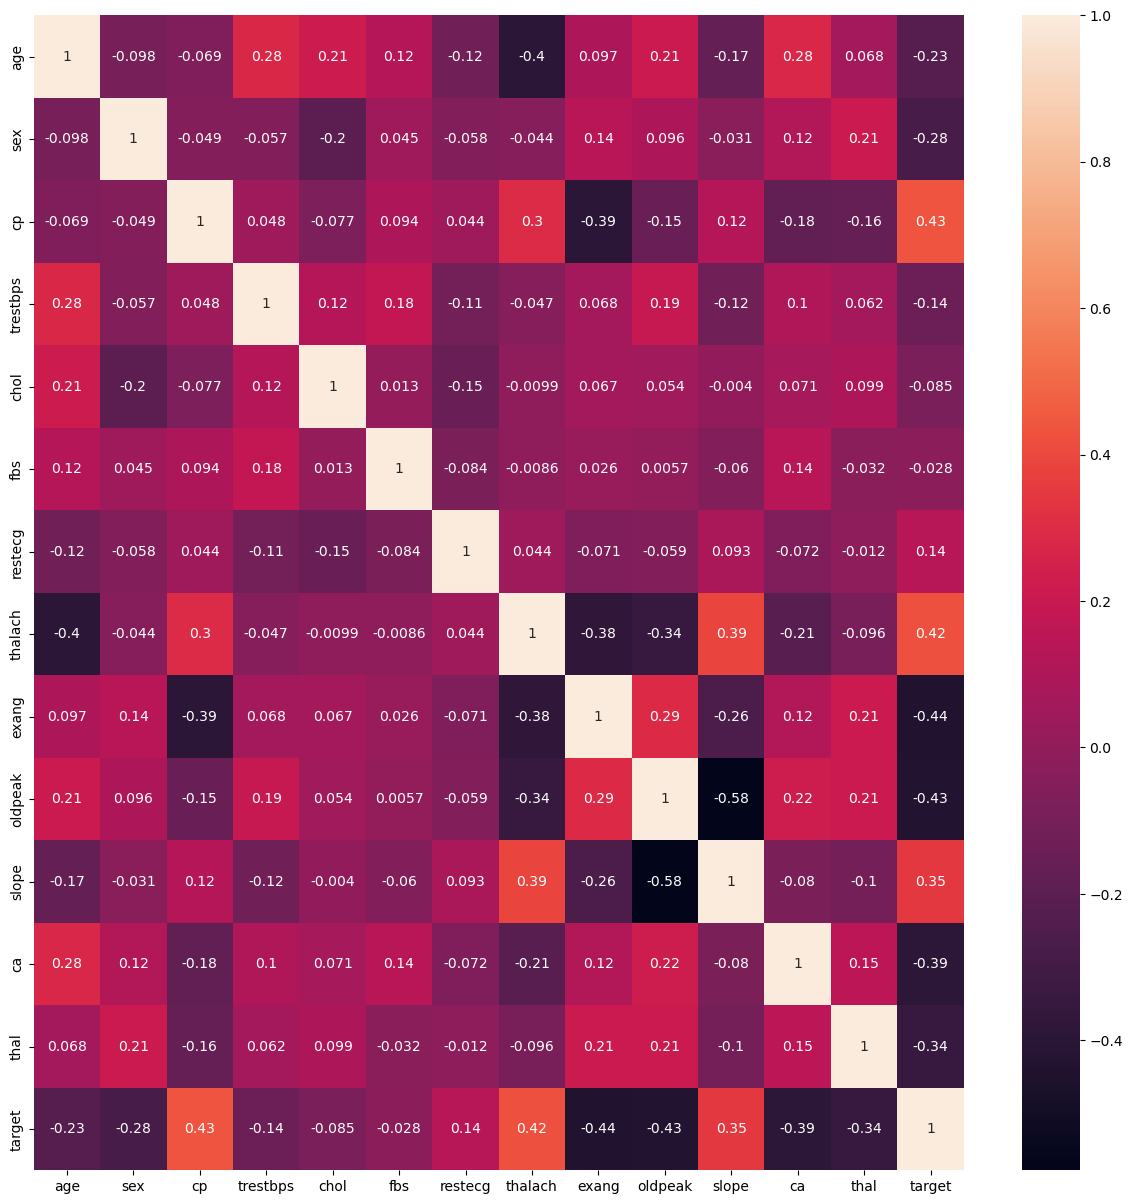

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# df.corr tapır, hansisi ile əlaqəsinin çox olması vacibdi.

# Correlation between target and other feature columns is important. We want them to be high.

# Correlation between columns themselves has to be low. They will explain target from different 'angles'.

# Negative correlation is also good. In 2 word, the main thing is to have a correlation near to zero.


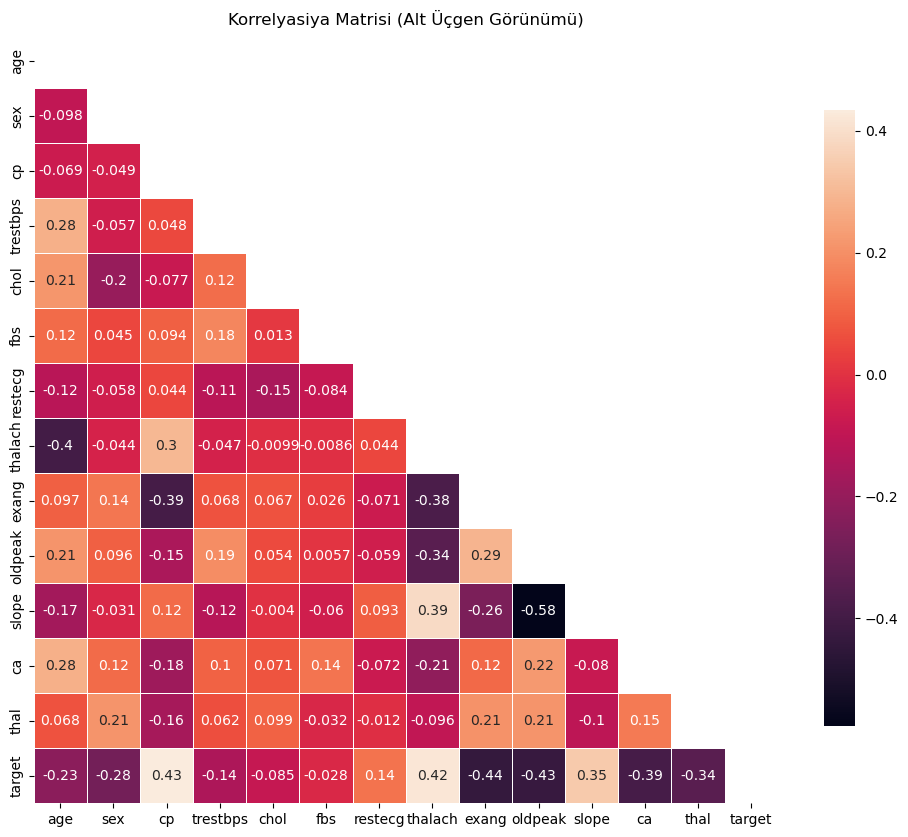

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, square=False,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Korrelyasiya Matrisi (Alt Üçgen Görünümü)")
plt.show()


In [20]:
df_out=copy.deepcopy(df)
df_out

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [21]:
df_out['cp'].unique()

array([3, 2, 1, 0])

In [22]:
df_out['restecg'].unique()

array([0, 1, 2])

In [23]:
df_out['slope'].unique()

array([0, 2, 1])

In [24]:
df_out['ca'].unique()

array([0, 2, 1, 3, 4])

In [26]:
df_out.duplicated().sum()

np.int64(1)

In [27]:
df_out[162:170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [29]:
df_out.drop_duplicates(inplace=True)

In [30]:
df_out[162:170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


In [31]:
df_out.reset_index(drop=True, inplace=True)

In [32]:
df_out[162:170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
166,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
167,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
168,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
169,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


# OHE - One Hot Encoding

In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df_out.cp.unique()

array([3, 2, 1, 0])

In [37]:
df_out.thal.unique()

array([1, 2, 3, 0])

In [38]:
df_out.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df_out[['cp','restecg','slope','ca','thal']]=df_out[['cp','restecg','slope','ca','thal']].astype(object)

In [40]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 33.2+ KB


In [ ]:
# pd.get_dummies(df_out, drop_first=True)

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

col_list = ['cp', 'thal', 'restecg', 'slope', 'ca']

ohe.fit(df_out[col_list])

transformed = ohe.transform(df_out[col_list]).toarray()

transformed_df = pd.DataFrame(data=transformed,
                              columns=ohe.get_feature_names_out(col_list))

transformed_df

,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
transformed_df.isnull().sum()

cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
restecg_0    0
restecg_1    0
restecg_2    0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

In [42]:
df_out.shape

(302, 14)

In [44]:
transformed_df.shape

(302, 19)

In [45]:
transformed_df.head()

,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [46]:
df_out.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# df_out.select_dtypes(include=['object'])
# df_dropped=df_out.drop(df_out.select_dtypes(include=['object']).columns,axis=1)

In [49]:
df_dropped=df_out.drop(col_list,axis=1)

In [50]:
df_dropped.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [51]:
df_dropped.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,63,1,145,233,1,150,0,2.3,1
1,37,1,130,250,0,187,0,3.5,1
2,41,0,130,204,0,172,0,1.4,1
3,56,1,120,236,0,178,0,0.8,1
4,57,0,120,354,0,163,1,0.6,1


In [52]:
df_dropped.shape

(302, 9)

In [53]:
transformed_df.isnull().sum()

cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
restecg_0    0
restecg_1    0
restecg_2    0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

In [54]:
df_final=pd.concat([df_dropped,transformed_df], axis=1)

In [55]:
df_final.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41,0,130,204,0,172,0,1.4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,56,1,120,236,0,178,0,0.8,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,57,0,120,354,0,163,1,0.6,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df_final.duplicated().sum()

np.int64(0)

In [57]:
df_final.shape

(302, 28)

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   sex        302 non-null    int64  
 2   trestbps   302 non-null    int64  
 3   chol       302 non-null    int64  
 4   fbs        302 non-null    int64  
 5   thalach    302 non-null    int64  
 6   exang      302 non-null    int64  
 7   oldpeak    302 non-null    float64
 8   target     302 non-null    int64  
 9   cp_0       302 non-null    float64
 10  cp_1       302 non-null    float64
 11  cp_2       302 non-null    float64
 12  cp_3       302 non-null    float64
 13  thal_0     302 non-null    float64
 14  thal_1     302 non-null    float64
 15  thal_2     302 non-null    float64
 16  thal_3     302 non-null    float64
 17  restecg_0  302 non-null    float64
 18  restecg_1  302 non-null    float64
 19  restecg_2  302 non-null    float64
 20  slope_0   

In [59]:
df_final.isnull().sum()

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
target       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
restecg_0    0
restecg_1    0
restecg_2    0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

# Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

X = df_final.drop('target', axis=1)
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=101,
    shuffle=True,
    stratify=y
)



In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((211, 27), (91, 27), (211,), (91,))

# Scaling

In [63]:
X_train.isnull().sum()

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
restecg_0    0
restecg_1    0
restecg_2    0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

In [69]:
X_train_=copy.deepcopy(X_train)
X_test_=copy.deepcopy(X_test)

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_)

X_train_scaled = ss.transform(X_train_)
X_test_scaled = ss.transform(X_test_)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler().fit(X_train_)
# X_train_scaled = mms.transform(X_train_)
# X_test_scaled = mms.transform(X_test_)


In [ ]:
# from sklearn.preprocessing import MaxAbsScaler
# mas = MaxAbsScaler().fit(X_train_)

# X_train_scaled = mas.transform(X_train_)
# X_test_scaled = mas.transform(X_test_)


In [ ]:
# # Robust for outliers (dangerous)
# from sklearn.preprocessing import RobustScaler
# rs = RobustScaler().fit(X_train_)

# X_train_scaled = rs.transform(X_trai_)
# X_test_scaled = rs.transform(X_test_)


### Think about data: 
Some models need scaled data, some not, but its okay for both if you scalled.
Do we always delete outlier from data?

In [72]:
X_train_scaled

array([[ 0.89374688, -1.46603333, -0.42245158, ..., -0.38306544,
        -0.27664167, -0.0978232 ],
       [ 1.00520113,  0.68211273, -0.07403223, ..., -0.38306544,
         3.61478446, -0.0978232 ],
       [-0.55515838, -1.46603333,  0.15824733, ..., -0.38306544,
        -0.27664167, -0.0978232 ],
       ...,
       [ 1.45101814, -1.46603333, -1.46770962, ...,  2.61052003,
        -0.27664167, -0.0978232 ],
       [-1.22388388,  0.68211273,  1.08736559, ..., -0.38306544,
        -0.27664167, -0.0978232 ],
       [ 1.67392664,  0.68211273,  0.50666668, ..., -0.38306544,
         3.61478446, -0.0978232 ]])

# Modeling

In [83]:
# For evaluation
models_list = ['Logistic Regression', 'KNN',
               'Naive Bayes', 'SVM linear', 'SVM rbf', 'SVM poly', 'SVM poly params',
               'Decision Tree', 'Random Forest']

accuracy_list, cv_mean_list, precision_list, recall_list, f1_list, aucScore_list = [], [], [], [], [], []


# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

classifier_object = LogisticRegression(random_state=42)
  
model_LR = classifier_object.fit(X_train_scaled, y_train)
y_pred_logistic_regression = model_LR.predict(X_test_scaled)


In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score

cm_logistic_regression = confusion_matrix(y_pred=y_pred_logistic_regression, 
                                          y_true=y_test)

print('Confusion Matrix:\n', cm_logistic_regression)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)

recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)

f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

accuracy_list.append(accuracy_logistic_regression)
precision_list.append(precision_logistic_regression)
recall_list.append(recall_logistic_regression)
f1_list.append(f1_logistic_regression)

print('\nAccuracy score:', accuracy_logistic_regression,
      '\nPrecision score:', precision_logistic_regression,
      '\nRecall score:', recall_logistic_regression,
      '\nF1 score:', f1_logistic_regression)

# TN    FP
# FN    TP

# TN - True Negative - düzgün 0 (həqiqətən sağlam idi)
# FN - False Negative - səhvən 0 - əslində 1 idi
# FP - False Positive - səhvən 1 - əslində 0 idi
# TP - True Positive - düzgün 1 (həqiqətən xəstə idi)

# precision - düzgün 1 dediklərinin / ümumi 1 dedikləri = 40 / 50 
# modelin 1 dedikləri neçəsi düzgündür

# recall - model 1 dedikləri ilə - realda olan 1lərin neçə faizini tapıb
# recall = 40 / (40 + 9) = 81%

# f1 = 2 * precision * recall / (precision + recall)


Confusion Matrix:
 [[32 10]
 [ 9 40]]

Accuracy score: 0.7912087912087912 
Precision score: 0.8 
Recall score: 0.8163265306122449 
F1 score: 0.8080808080808081


In [89]:
from sklearn.metrics import classification_report
print(cm_logistic_regression)
print(classification_report(y_test, y_pred_logistic_regression))


[[32 10]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.80      0.82      0.81        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [90]:
# Precision 1:
# precision = true positive / True Positive + False Positive

# Recall 1:
# recall = True Positive / actual düzgünlüyar
# recall = True Positive / True Positive + False Negative

# Precision 0:
# precision = True Negative / True Negative + False Negative

# Recall 0:
# recall = True Negative / True Negative + False Positive

# TN   FP
# FN   TP

In [91]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=model_LR, 
                             X=X_train_scaled, 
                             y=y_train, 
                             cv=4, 
                             n_jobs=-1, 
                             verbose=2)

# n_jobs = 1 → one core
# n_jobs = -1 → unlimited
# VERBOSE → shows process

mean = accuracies.mean()
cv_mean_list.append(mean)

print('Mean accuracy of cross validation:', mean)
print('Standard deviation of cross validation results:', accuracies.std())

# look at standard deviation - if there is high difference between different models' std → it is problem


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.8673802612481858
Standard deviation of cross validation results: 0.041956443849792226


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s finished


In [92]:
accuracies


array([0.8490566 , 0.81132075, 0.9245283 , 0.88461538])

In [93]:
y_pred_logistic_regression


array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0])

In [94]:
y_test

294    0
224    0
296    0
301    0
54     1
92     1
247    0
      ..
137    1
112    1
227    0
223    0
259    0
122    1
251    0
Name: target, Length: 91, dtype: int64

In [95]:
type(y_test)

pandas.core.series.Series

In [96]:
y_test.to_numpy()

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0])

0.8683187560738581



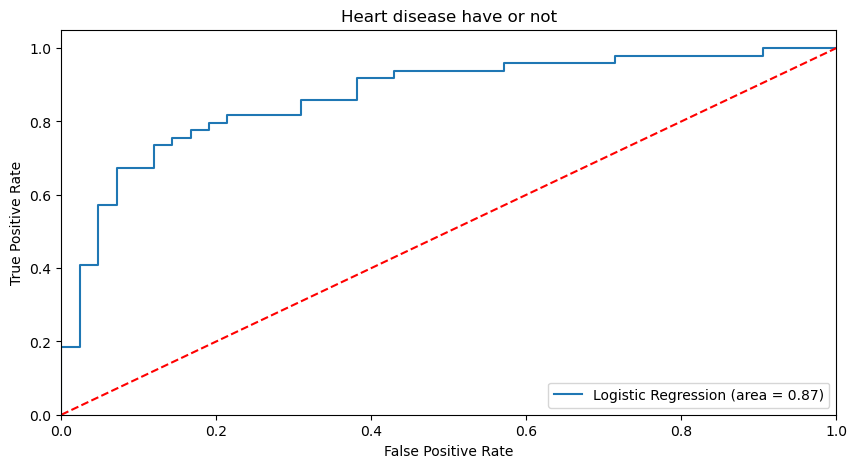

In [97]:
# model_LR.predict_proba(X_test_scaled)[:,1]
# model_LR.predict_proba(X_test_scaled)[:,1]>0.5  # this is prediction, how it comes to the end (0 or 1). default is 0.5 in all models
# you can put threshold to 0.9 with this method manually. Means that if probability is bigger than 0.9 take it as 1, if smaller take it as 0 (zero)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

result = roc_auc_score(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
# print(fpr)        # numbers don't look at deeply. 1 is specifity
# print(tpr)        # recall
# print(thresholds) # red line
print()

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc='lower right')
plt.savefig('Roc Auc Curve of Logistic Regression Model')
plt.show()


# PCA (Principal Component Analysis)

Confusion Matrix:
 [[36  6]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



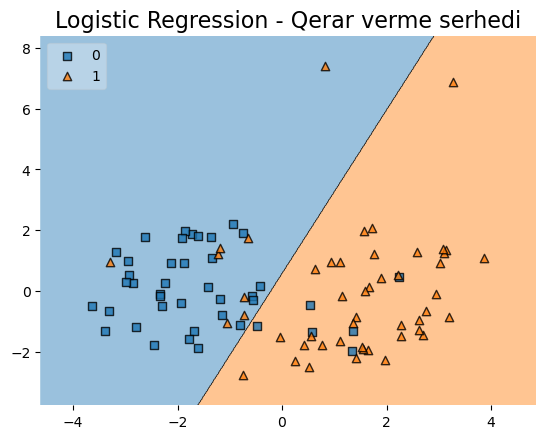

In [103]:

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
cm_pca_logistic_regression = confusion_matrix(y_pred=y_pred_pca, y_true=y_test)
print('Confusion Matrix:\n', cm_pca_logistic_regression)
# TN   FP
# FN   TP

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('Logistic Regression - Qerar verme serhedi', size=16)
plt.show()


# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier_object = KNeighborsClassifier(n_neighbors=7, n_jobs=-1, metric='euclidean')
model_KNN = classifier_object.fit(X_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)


In [105]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:", cm_KNN)

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)

accuracy_list.append(accuracy_KNN)
precision_list.append(precision_KNN)
recall_list.append(recall_KNN)
f1_list.append(f1_KNN)

print("Accuracy score:", accuracy_KNN)
print("Precision score:", precision_KNN)
print("Recall score:", recall_KNN)
print("f1 score:", f1_KNN)


Confusion Matrix: [[33  9]
 [ 7 42]]
Accuracy score: 0.8241758241758241
Precision score: 0.8235294117647058
Recall score: 0.8571428571428571
f1 score: 0.84


In [106]:
accuracies = cross_val_score(estimator=model_KNN, X=X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)

print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", accuracies.std())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.8483309143686503
Standard deviation of cross validation results: 0.023142552567637115


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.2s finished


0.8952866861030127



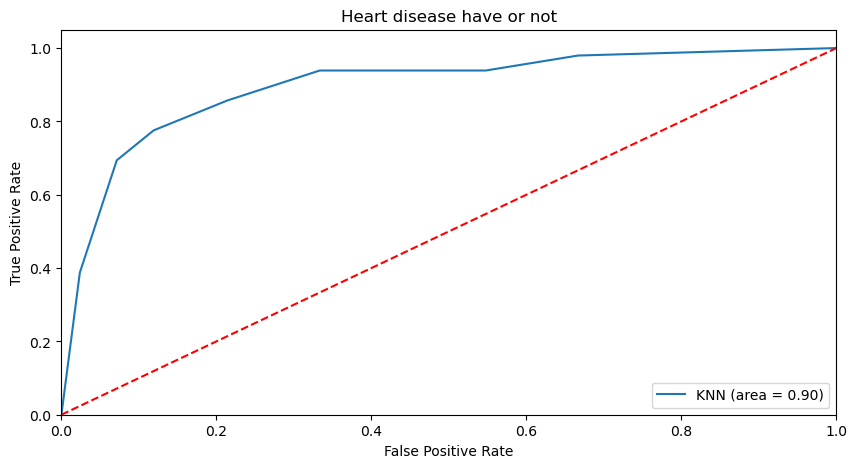

In [107]:
predict_proba_KNN = model_KNN.predict_proba(X_test_scaled)

result = roc_auc_score(y_test, model_KNN.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_KNN.predict_proba(X_test_scaled)[:,1])
print()

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc='lower right')
plt.savefig('Roc Auc Curve of KNN Model')
plt.show()


Confusion Matrix:
 [[33  9]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.83      0.90      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



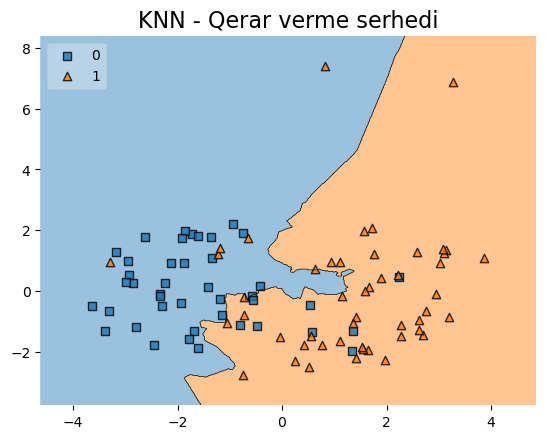

In [108]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

model_pca = classifier_object.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

cm_pca_KNN = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:\n", cm_pca_KNN)

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('KNN - Qerar verme serhedi', size=16)
plt.show()


# Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

classifier_object = GaussianNB()
model_NB = classifier_object.fit(X_train_scaled, y_train)
y_pred_NB = model_NB.predict(X_test_scaled)

cm_NB = confusion_matrix(y_test, y_pred_NB)
print("Confusion Matrix:\n", cm_NB)

accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

accuracy_list.append(accuracy_NB)
precision_list.append(precision_NB)
recall_list.append(recall_NB)
f1_list.append(f1_NB)

print("\nAccuracy score:", accuracy_NB,
      "\nPrecision score:", precision_NB,
      "\nRecall score:", recall_NB,
      "\nf1 score:", f1_NB)


Confusion Matrix:
 [[34  8]
 [ 8 41]]

Accuracy score: 0.8241758241758241 
Precision score: 0.8367346938775511 
Recall score: 0.8367346938775511 
f1 score: 0.8367346938775511


In [110]:
accuracies = cross_val_score(estimator=model_KNN, X=X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)

print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", accuracies.std())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.8483309143686503
Standard deviation of cross validation results: 0.023142552567637115


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.9s finished


0.8843537414965987


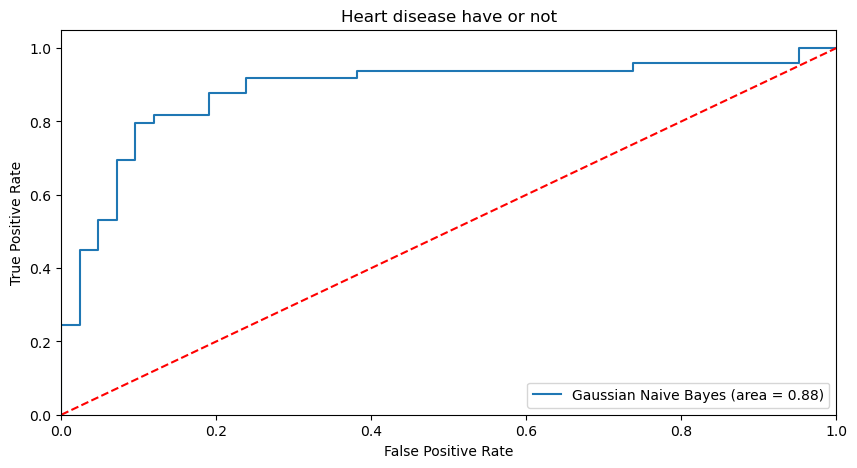

In [114]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model_NB.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_NB.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc='lower right')
plt.savefig('Roc Auc Curve of Gaussian Naive Bayes Model')
plt.show()


Confusion Matrix:
 [[37 10]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        42
           1       0.89      0.80      0.84        49

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



Text(0.5, 1.0, 'Gaussian Naive Bayes - Qerar verme serhedi.')

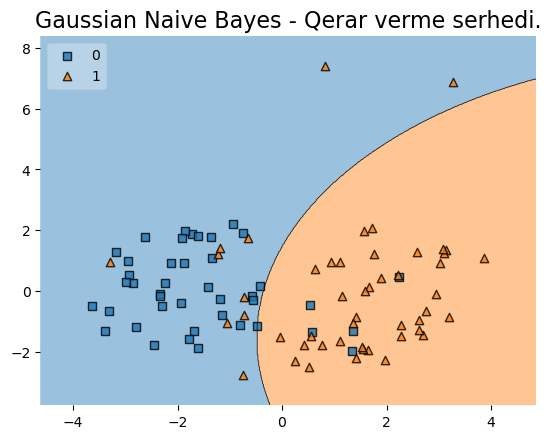

In [116]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
cm_pca_NB = confusion_matrix(y_pred_pca, y_test)
print("Confusion Matrix:\n", cm_pca_NB)

# TN   FP
# FN   TP

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('Gaussian Naive Bayes - Qerar verme serhedi.', size=16)


# SVM 

kernel - rfb - more smooth line


In [118]:
from sklearn.svm import SVC

classifier_object = SVC(kernel='rbf', random_state=2, probability=True)

model_SVC_rbf = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_rbf = model_SVC_rbf.predict(X_test_scaled)

cm_SVC = confusion_matrix(y_test, y_pred_SVC_rbf)
print("Confusion Matrix:\n", cm_SVC)

accuracy_SVC = accuracy_score(y_test, y_pred_SVC_rbf)
precision_SVC = precision_score(y_test, y_pred_SVC_rbf)
recall_SVC = recall_score(y_test, y_pred_SVC_rbf)
f1_SVC = f1_score(y_test, y_pred_SVC_rbf)

accuracy_list.append(accuracy_SVC)
precision_list.append(precision_SVC)
recall_list.append(recall_SVC)
f1_list.append(f1_SVC)

print("Accuracy score:", accuracy_SVC)
print("Precision score:", precision_SVC)
print("Recall score:", recall_SVC)
print("F1 score:", f1_SVC)


Confusion Matrix:
 [[32 10]
 [ 6 43]]
Accuracy score: 0.8241758241758241
Precision score: 0.8113207547169812
Recall score: 0.8775510204081632
F1 score: 0.8431372549019608


In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Model
model_SVM_rbf = SVC(kernel="rbf")
model_SVM_rbf.fit(X_train_scaled, y_train)

# Cross Validation
accuracies = cross_val_score(
    estimator=model_SVM_rbf,
    X=X_train_scaled,
    y=y_train,
    cv=4,
    n_jobs=-1,
    verbose=2
)

print("Cross-validation accuracies:", accuracies)
print("Mean accuracy:", accuracies.mean())

accu_mean_list.append(accuracies.mean())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross-validation accuracies: [0.8490566  0.81132075 0.90566038 0.80769231]
Mean accuracy: 0.8434325108853411


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished


NameError: name 'accu_mean_list' is not defined

AUC Score: 0.8892128279883381


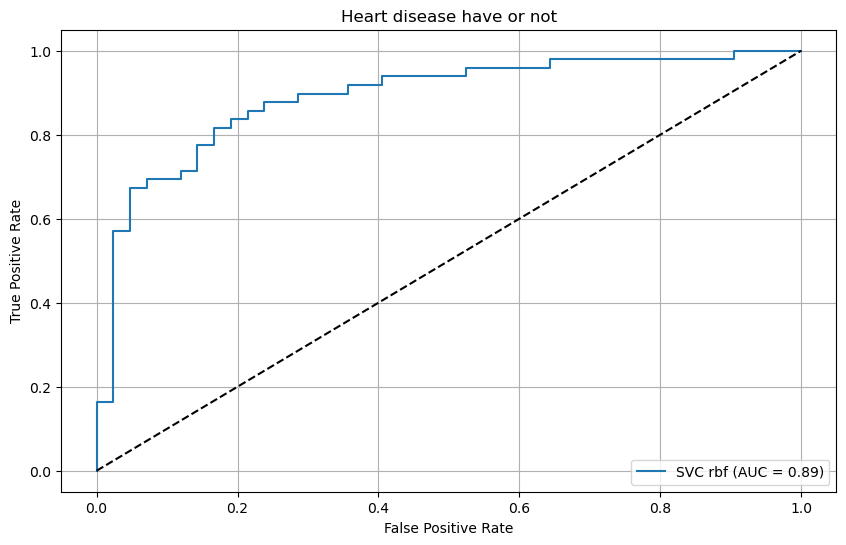

In [124]:

# ROC-AUC
result = roc_auc_score(y_test, model_SVM_rbf.predict_proba(X_test_scaled)[:, 1])
print("AUC Score:", result)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_SVM_rbf.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="SVC rbf (AUC = %0.2f)" % result)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Heart disease have or not")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Confusion Matrix: [[32 10]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.82      0.92      0.87        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



Text(0.5, 1.0, 'SVC - Qərar vermə sərhəddi')

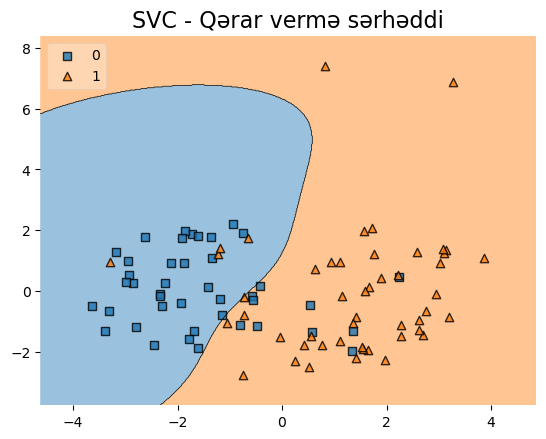

In [125]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
cm_pca_SVC = confusion_matrix(y_pred=y_pred_pca, y_true=y_test)
print("Confusion Matrix:", cm_pca_SVC)
# FN  TP
# FN  TP

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('SVC - Qərar vermə sərhəddi', size=16)


### Kernel - linear - makes line from mean or plane with that way it seperates classes 

In [126]:

classifier_object = SVC(kernel='linear', random_state=2, probability=True)
model_SVC_linear = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_linear = model_SVC_linear.predict(X_test_scaled)

cm_SVC_linear = confusion_matrix(y_pred=y_pred_SVC_linear, y_true=y_test)
print("Confusion Matrix:", cm_SVC_linear)

accuracy_SVC_linear = accuracy_score(y_test, y_pred_SVC_linear)
precision_SVC_linear = precision_score(y_test, y_pred_SVC_linear)
recall_SVC_linear = recall_score(y_test, y_pred_SVC_linear)
f1_SVC_linear = f1_score(y_test, y_pred_SVC_linear)

accuracy_list.append(accuracy_SVC_linear)
precision_list.append(precision_SVC_linear)
recall_list.append(recall_SVC_linear)
f1_list.append(f1_SVC_linear)

print("Accuracy score:", accuracy_SVC_linear)
print("Precision score:", precision_SVC_linear)
print("Recall score:", recall_SVC_linear)
print("F1 score:", f1_SVC_linear)

# FN  TP
# FN  TP


Confusion Matrix: [[33  9]
 [ 9 40]]
Accuracy score: 0.8021978021978022
Precision score: 0.8163265306122449
Recall score: 0.8163265306122449
F1 score: 0.8163265306122449


In [136]:
# SVC Linear model
classifier_object = SVC(kernel='linear', random_state=2, probability=True)
model_SVM_linear = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_linear = model_SVM_linear.predict(X_test_scaled)


accu_list = []

# Cross validation
accuracies = cross_val_score(estimator=model_SVM_linear,
                             X=X_train_scaled,
                             y=y_train,
                             cv=4,
                             n_jobs=-1,
                             verbose=3)

mean = accuracies.mean()
std = accuracies.std()

accu_list.append(mean)

print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation result:", std)


Mean accuracy of cross validation: 0.8480587808417996
Standard deviation of cross validation result: 0.06757166742428354


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


0.8639455782312925


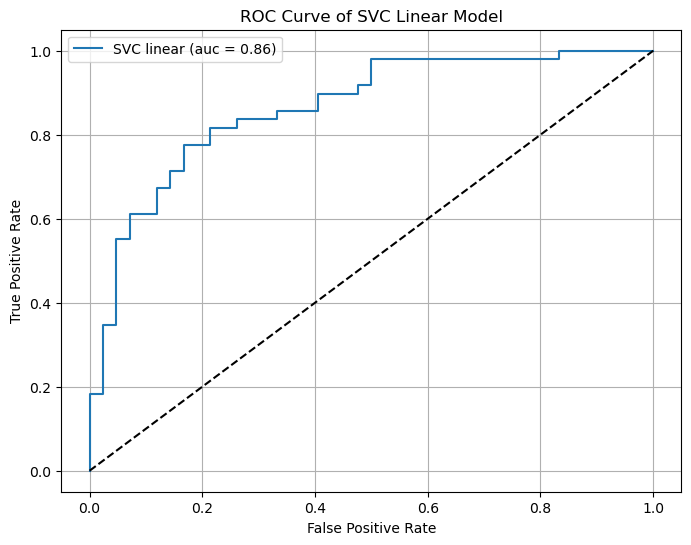

In [140]:

result = roc_auc_score(y_test, model_SVM_linear.predict_proba(X_test_scaled)[:, 1])
print(result)

aucscore_list.append(result)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_SVM_linear.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVC linear (auc = %.2f)' % result)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVC Linear Model')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
 [[35  8]
 [ 7 41]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.85      0.84      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



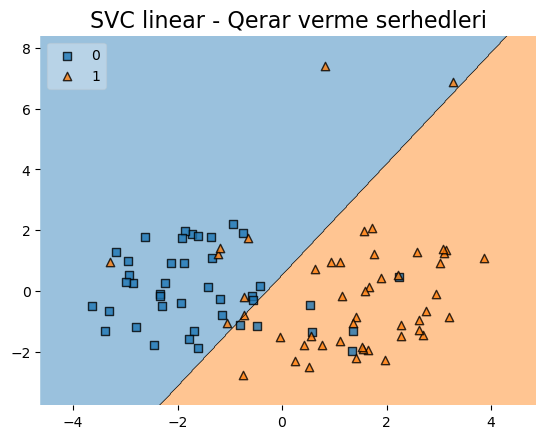

In [141]:
# PCA ilə SVC Linear model qurulması
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

cm_pca_SVC = confusion_matrix(y_pred_pca, y_test)
print("Confusion Matrix:\n", cm_pca_SVC)

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title("SVC linear - Qerar verme serhedleri", size=16)
plt.show()


### kernel - poly ______ then _____ r - coef0 ve d - degree can be given (a*b + r)**d


In [142]:
# SVC with polynomial kernel
classifier_object = SVC(kernel='poly', random_state=0, probability=True)
model_SVM_poly = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_poly = model_SVM_poly.predict(X_test_scaled)

# confusion matrix
cm_SVC_poly = confusion_matrix(y_test, y_pred_SVC_poly)
print(cm_SVC_poly)

# performance metrics
accuracy_SVC_poly = accuracy_score(y_test, y_pred_SVC_poly)
precision_SVC_poly = precision_score(y_test, y_pred_SVC_poly)
recall_SVC_poly = recall_score(y_test, y_pred_SVC_poly)
f1_SVC_poly = f1_score(y_test, y_pred_SVC_poly)

accuracy_list.append(accuracy_SVC_poly)
precision_list.append(precision_SVC_poly)
recall_list.append(recall_SVC_poly)
f1_list.append(f1_SVC_poly)

# print same as in screenshot
print("Accuracy score: %s" % accuracy_SVC_poly)
print("Precision score: %s" % precision_SVC_poly)
print("Recall score: %s" % recall_SVC_poly)
print("F1 score: %s" % f1_SVC_poly)


[[28 14]
 [ 5 44]]
Accuracy score: 0.7912087912087912
Precision score: 0.7586206896551724
Recall score: 0.8979591836734694
F1 score: 0.822429906542056


In [145]:
accuracies = cross_val_score(estimator=model_SVM_poly, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
accu_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", accuracies.std())



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.8292815674891147
Standard deviation of cross validation results: 0.019816603228819833


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.8s finished


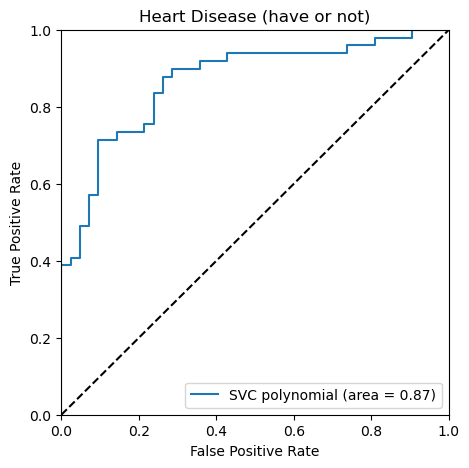

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, model_SVM_poly.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label="SVC polynomial (area = %.2f)" % result)
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Heart Disease (have or not)")
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:  [[28  6]
 [14 43]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        42
           1       0.75      0.88      0.81        49

    accuracy                           0.78        91
   macro avg       0.79      0.77      0.77        91
weighted avg       0.79      0.78      0.78        91



Text(0.5, 1.0, 'SVC polynomial - Qerar verme serhedi')

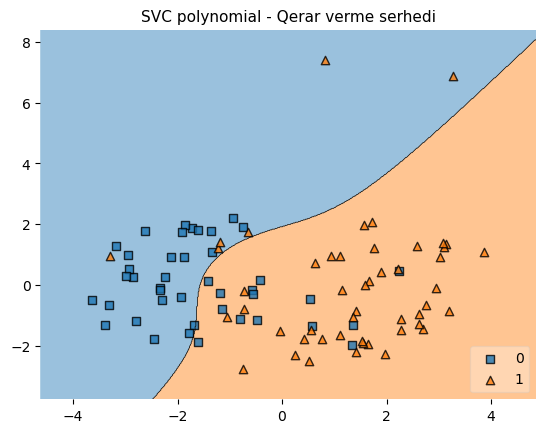

In [147]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
cm_pca_SVC_poly = confusion_matrix(y_pred_pca, y_test) 
print("Confusion Matrix: ", cm_pca_SVC_poly)

# FN / FP
print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=4)
plt.title("SVC polynomial - Qerar verme serhedi", size=11)


### degree ve coef0 vererek poly model – low performance, hard interpretation, black box model


In [148]:
classifier_object = SVC(kernel="poly", random_state=0, probability=True, degree=4, coef0=2.0)
model_SVM_poly_params = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVM_poly_params = model_SVM_poly_params.predict(X_test_scaled)


In [150]:

cm_SVC_poly_params = confusion_matrix(y_test, y_pred_SVM_poly_params)
print("Confusion Matrix: ", cm_SVC_poly_params)

accuracy_SVC_poly_params = accuracy_score(y_test, y_pred_SVM_poly_params)
precision_SVC_poly_params = precision_score(y_test, y_pred_SVM_poly_params)
recall_SVC_poly_params = recall_score(y_test, y_pred_SVM_poly_params)
f1_SVC_poly_params = f1_score(y_test, y_pred_SVM_poly_params)

accuracy_list.append(accuracy_SVC_poly_params)
precision_list.append(precision_SVC_poly_params)
recall_list.append(recall_SVC_poly_params)
f1_list.append(f1_SVC_poly_params)

print("Accuracy score: ", accuracy_SVC_poly_params)
print("Precision score: ", precision_SVC_poly_params)
print("Recall score: ", recall_SVC_poly_params)
print("f1 score: ", f1_SVC_poly_params)


Confusion Matrix:  [[32 10]
 [11 38]]
Accuracy score:  0.7692307692307693
Precision score:  0.7916666666666666
Recall score:  0.7755102040816326
f1 score:  0.7835051546391752


In [151]:
accuracies = cross_val_score(estimator=model_SVM_poly_params, 
                             X=X_train_scaled, 
                             y=y_train, 
                             cv=4, 
                             n_jobs=-1, 
                             verbose=2)

mean = accuracies.mean()
std = accuracies.std()

print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", std)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.7628809869375908
Standard deviation of cross validation results: 0.02284121091524959


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s finished


0.8270165208940718



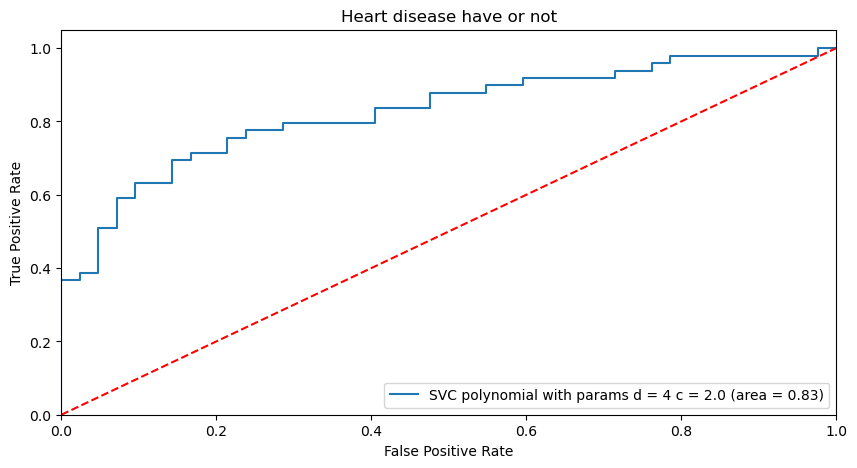

In [152]:
result = roc_auc_score(y_test, model_SVM_poly_params.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_SVM_poly_params.predict_proba(X_test_scaled)[:,1])
print()

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC polynomial with params d = 4 c = 2.0 (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc='lower right')
plt.savefig('Roc Auc curve of SVC polynomial with params Model')
plt.show()


Confusion Matrix:: 
 [[30  5]
 [12 44]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        42
           1       0.79      0.90      0.84        49

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



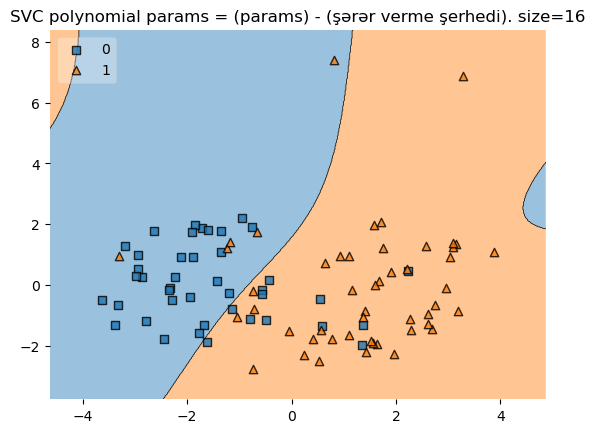

In [153]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
cm_pca_SVC_poly_params = confusion_matrix(y_pred_pca, y_test) 
print("Confusion Matrix:: \n", cm_pca_SVC_poly_params)
# F N
# F N

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title("SVC polynomial params = (params) - (şərər verme şerhedi). size=16")
plt.show()


# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
classifier_object = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_DT = classifier_object.fit(X_train_scaled, y_train)
y_pred_DT = model_DT.predict(X_test_scaled)

cm_DT = confusion_matrix(
    y_pred=y_pred_DT, y_true=y_test
)
print('Confusion Matrix:\n', cm_DT)

accuracy_DT = accuracy_score(
    y_test, y_pred_DT)

precision_DT = precision_score(
    y_test, y_pred_DT)

recall_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)

accuracy_list.append(accuracy_DT)
precision_list.append(precision_DT)
recall_list.append(recall_DT)
f1_list.append(f1_DT)

print('\nAccuracy score:', accuracy_DT,
      '\nPrecision score:', precision_DT,
      '\nRecall score:', recall_DT,
      '\nf1 score:', f1_DT)


Confusion Matrix:
 [[32 10]
 [10 39]]

Accuracy score: 0.7802197802197802 
Precision score: 0.7959183673469388 
Recall score: 0.7959183673469388 
f1 score: 0.7959183673469388


In [155]:
from sklearn.tree import DecisionTreeClassifier

classifier_object = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_DT = classifier_object.fit(X_train_scaled, y_train)
y_pred_DT = model_DT.predict(X_test_scaled)

cm_DT = confusion_matrix(
    y_pred=y_pred_DT, y_true=y_test
)
print("Confusion Matrix:\n", cm_DT)

accuracy_DT = accuracy_score(
    y_test, y_pred_DT
)
precision_DT = precision_score(
    y_test, y_pred_DT
)
recall_DT = recall_score(
    y_test, y_pred_DT
)
f1_DT = f1_score(
    y_test, y_pred_DT
)

accuracy_list.append(accuracy_DT)
precision_list.append(precision_DT)
recall_list.append(recall_DT)
f1_list.append(f1_DT)

print("\nAccuracy score:", accuracy_DT)
print("Precision score:", precision_DT)
print("Recall score:", recall_DT)
print("f1 score:", f1_DT)

accuracies = cross_val_score(estimator=model_DT, X=X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", accuracies.std())



Confusion Matrix:
 [[32 10]
 [10 39]]

Accuracy score: 0.7802197802197802
Precision score: 0.7959183673469388
Recall score: 0.7959183673469388
f1 score: 0.7959183673469388


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.7582547169811321
Standard deviation of cross validation results: 0.02817878100318051


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.9s finished


0.7789115646258503



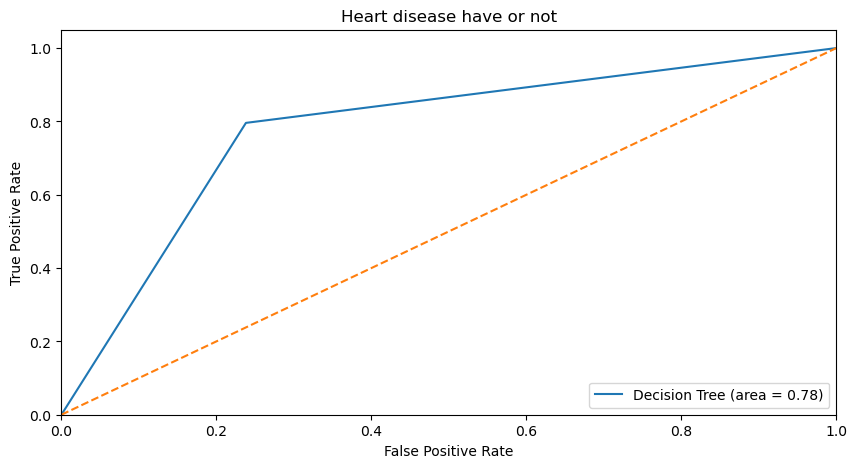

In [156]:
result = roc_auc_score(y_test, model_DT.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_DT.predict_proba(X_test_scaled)[:,1])
print()

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc='lower right')
plt.savefig('Roc Auc Curve of Decision Tree Model')
plt.show()

Confusion Matrix:
 [[33  9]
 [10 39]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        42
           1       0.81      0.80      0.80        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



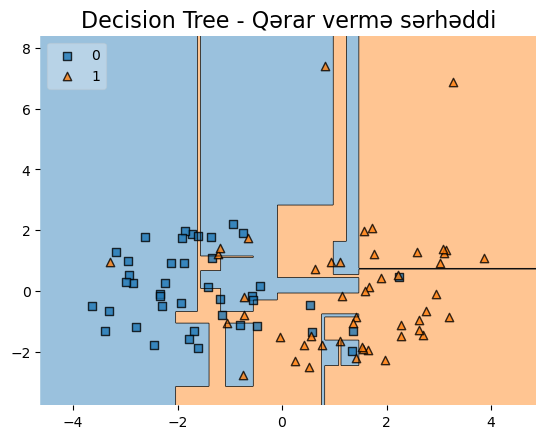

In [158]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

cm_pca_DT = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:\n", cm_pca_DT)

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('Decision Tree - Qərar vermə sərhəddi', size=16)
plt.show()


# Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

classifier_object = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    random_state=7,
    n_jobs=-1
)

model_RF = classifier_object.fit(X_train_scaled, y_train)
y_pred_RF = model_RF.predict(X_test_scaled)


In [164]:
accuracies = cross_val_score(estimator=model_RF,
                             X=X_train_scaled,
                             y=y_train,
                             cv=4,
                             n_jobs=-1,
                             verbose=2)

mean = accuracies.mean()
cv_mean_list.append(mean)

print("Mean accuracy of cross validation:", mean)
print("Standard deviation of cross validation results:", accuracies.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean accuracy of cross validation: 0.8435232220609579
Standard deviation of cross validation results: 0.02835228547303192


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.5s finished


0.8751214771622935


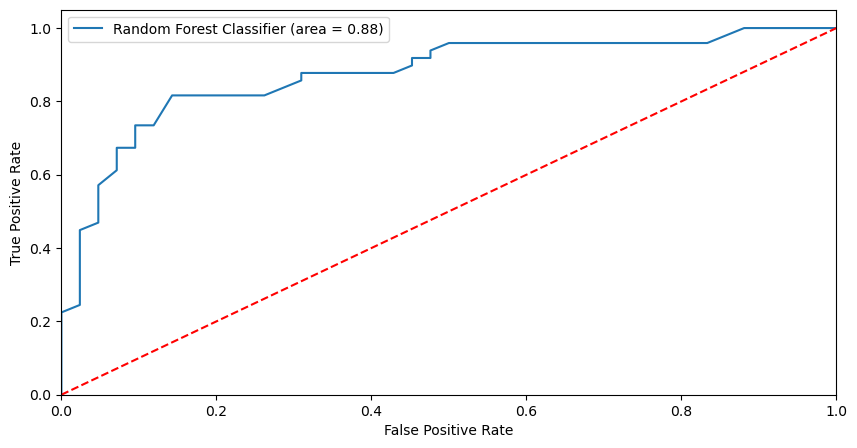

In [166]:
# Modeli tam feature setlə yenidən tren edin
model_RF = RandomForestClassifier()
model_RF.fit(X_train_scaled, y_train)

# ROC – AUC
result = roc_auc_score(y_test, model_RF.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_RF.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %.2f)' % result)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Confusion Matrix:
 [[33  9]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.82      0.84      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



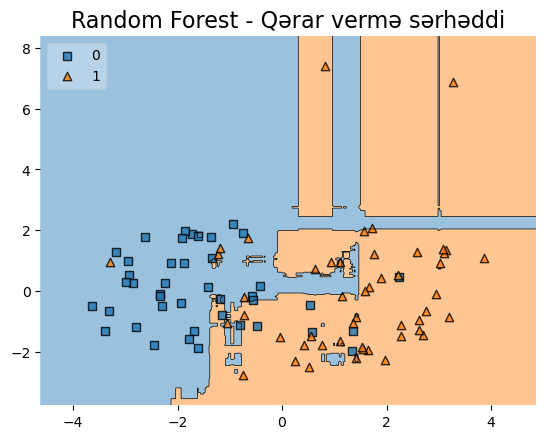

In [163]:
model_pca = classifier_object.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

cm_pca_RF = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:\n", cm_pca_RF)

print(classification_report(y_test, y_pred_pca))

plot_decision_regions(X_test_pca, y_test.to_numpy(), clf=model_pca, legend=2)
plt.title('Random Forest - Qərar vermə sərhəddi', size=16)
plt.show()


## Evaluation

In [167]:
myEvaluation = list(zip(models_list, accuracy_list, cv_mean_list, precision_list, recall_list, f1_list, aucScore_list))


In [168]:
df = pd.DataFrame(data=myEvaluation, 
                  columns=['Model', 'Accuracy', 'CV_mean', 'Precision', 'Recall', 'F1_score', 'Auc_Score'])


In [169]:
df

,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score
0,Logistic Regression,0.791209,0.867380,0.800000,0.816327,0.808081,0.868319
1,KNN,0.791209,0.867380,0.823529,0.857143,0.840000,0.895287
2,Naive Bayes,0.824176,0.848331,0.836735,0.836735,0.836735,0.884354
3,SVM linear,0.824176,0.848331,0.811321,0.877551,0.843137,0.827017
4,SVM rbf,0.824176,0.758255,0.816327,0.816327,0.816327,0.778912
5,SVM poly,0.802198,0.843523,0.758621,0.897959,0.822430,0.875121


In [170]:
myEvaluation = list(zip(models_list, accuracy_list, cv_mean_list, precision_list, recall_list, f1_list, aucScore_list))

df = pd.DataFrame(data=myEvaluation, 
                  columns=['Model', 'Accuracy', 'CV_mean', 'Precision', 'Recall', 'F1_score', 'Auc_Score'])

df


,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score
0,Logistic Regression,0.791209,0.867380,0.800000,0.816327,0.808081,0.868319
1,KNN,0.791209,0.867380,0.823529,0.857143,0.840000,0.895287
2,Naive Bayes,0.824176,0.848331,0.836735,0.836735,0.836735,0.884354
3,SVM linear,0.824176,0.848331,0.811321,0.877551,0.843137,0.827017
4,SVM rbf,0.824176,0.758255,0.816327,0.816327,0.816327,0.778912
5,SVM poly,0.802198,0.843523,0.758621,0.897959,0.822430,0.875121


In [175]:
df['Overall'] = df.iloc[:, 1:7].mean(axis='columns')
df


,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score,Overall
0,Logistic Regression,0.791209,0.867380,0.800000,0.816327,0.808081,0.868319,0.825219
1,KNN,0.791209,0.867380,0.823529,0.857143,0.840000,0.895287,0.845758
2,Naive Bayes,0.824176,0.848331,0.836735,0.836735,0.836735,0.884354,0.844511
3,SVM linear,0.824176,0.848331,0.811321,0.877551,0.843137,0.827017,0.838589
4,SVM rbf,0.824176,0.758255,0.816327,0.816327,0.816327,0.778912,0.801720
5,SVM poly,0.802198,0.843523,0.758621,0.897959,0.822430,0.875121,0.833309


In [176]:
df.sort_values(by=['Overall','F1_score', 'CV_mean', 'Auc_Score'], ascending=False)


,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score,Overall
1,KNN,0.791209,0.867380,0.823529,0.857143,0.840000,0.895287,0.845758
2,Naive Bayes,0.824176,0.848331,0.836735,0.836735,0.836735,0.884354,0.844511
3,SVM linear,0.824176,0.848331,0.811321,0.877551,0.843137,0.827017,0.838589
5,SVM poly,0.802198,0.843523,0.758621,0.897959,0.822430,0.875121,0.833309
0,Logistic Regression,0.791209,0.867380,0.800000,0.816327,0.808081,0.868319,0.825219
4,SVM rbf,0.824176,0.758255,0.816327,0.816327,0.816327,0.778912,0.801720


In [177]:
df.sort_values(by=['Overall','F1_score', 'CV_mean', 'Auc_Score'], ascending=False).iloc[0]


Model             KNN
Accuracy     0.791209
CV_mean       0.86738
Precision    0.823529
Recall       0.857143
F1_score         0.84
Auc_Score    0.895287
Overall      0.845758
Name: 1, dtype: object

# Thanks